# Airline On-Time Statistics and Delay Causes

### Importing libraries and data

In [61]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

In [2]:
#Importing data sets

list_1 = ['http://stat-computing.org/dataexpo/2009/2007.csv.bz2',
           'http://stat-computing.org/dataexpo/2009/2008.csv.bz2']

list_2 = ['http://stat-computing.org/dataexpo/2009/airports.csv']

list_3 = ['http://stat-computing.org/dataexpo/2009/carriers.csv']

list_4 = ['http://stat-computing.org/dataexpo/2009/plane-data.csv']

def df_reader(path_list):
    """Function to read csv into Data Frame"""
    init_list = []
    
    if len(path_list) > 1:
        for i in range(len(path_list)):
            output = pd.read_csv(path_list[i])
            init_list.append(output)
        df = pd.concat(init_list, ignore_index = True)
    else:
        df = pd.read_csv(path_list[0])
        
    return df

In [3]:
###Creating Data Frames

#Main data frame
df = df_reader(list_1)

#Coordinates of airports (city, state, latitude, longitude)
df_airports = df_reader(list_2)

#Carrier codes
df_carrier = df_reader(list_3)

#Plane details (type, manufacturer, issue_date, model, engine_type, etc.)
df_plane_data = df_reader(list_4)

In [4]:
#Printing column names of all extra data frames

print(df_airports.columns)
print(df_carrier.columns)
print(df_plane_data.columns)

Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')
Index(['Code', 'Description'], dtype='object')
Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')


In [5]:
#Printing shape of all extra data frames

print(df_airports.shape)
print(df_carrier.shape)
print(df_plane_data.shape)

(3376, 7)
(1491, 2)
(5029, 9)


In [6]:
#Checking number of NaN values

print(df_airports.info())
print(df_carrier.info())
print(df_plane_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
Code           1490 non-null object
Description    1491 non-null object
dtypes: object(2)
memory usage: 23.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
tailnum          5029 non-null object
type             4480 non-null object
manufacturer     4480 non-null object
issue_date       4480 non-null object
model            4480 non-null object
status           4480 non-null object
aircraft_type    4480 non-null object
engine_type  

### Data Cleaning, Merging and Wrangling

In [7]:
#Printing main Data Frame info

print('Number of rows in data frame: {}'.format(df.shape[0]))
print('Number of columns with NaN values: {}'.format(df.loc[:, df.isnull().any()].count().shape[0]))
print(df.columns)

Number of rows in data frame: 14462943
Number of columns with NaN values: 16
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [8]:
#Checking whether all carrier's codes included in df occur in df_carrier_code

df_carrier_code = df_carrier.Code.unique().tolist()

df_code = df.UniqueCarrier.unique().tolist()

ls = [n for n in df_code if n in df_carrier_code]

if len(ls) == len(df_code):
    print('All {} codes included in df occur in df_carrier'.format(len(df_code)))

All 20 codes included in df occur in df_carrier


In [9]:
#Checking whether all destination's codes included in df occur in df_airports_iata

df_airports_iata = df_airports.iata.unique().tolist()

df_origin = df.Origin.unique().tolist()
df_dest = df.Dest.unique().tolist()
    
ls_o = [n for n in df_origin if n in df_airports_iata]
ls_d = [m for m in df_dest if m in df_airports_iata]

if len(ls_o) == len(df_origin)and len(ls_d) == len(df_dest):
    print('All {} codes included in df occur in df_airports'.format(len(df_origin) + len(df_dest)))

All 628 codes included in df occur in df_airports


In [10]:
#Checking whether all TailNums included in df occur in df_plane_data

df_plane_data_tailnum = df_plane_data.tailnum.unique().tolist()

df_tailnum = df.TailNum.unique().tolist()

ls_t = [n for n in df_tailnum if n in df_plane_data_tailnum]

suma = 0
if len(ls_t) == len(df_tailnum):
    print('All {} TailNums included in df occur in df_plane_data'.format(len(df_tailnum)))
else:
    for n in df_tailnum:
        if n not in df_plane_data_tailnum:
            suma += 1
    print('{} TailNums included in df do not occur in df_plane_data'.format(suma))

print('Number of unique tailnums in df: ' + str(len(df_tailnum)))
print('Number of unique tailnums in df_plane: ' + str(len(df_plane_data)))

1041 TailNums included in df do not occur in df_plane_data
Number of unique tailnums in df: 5921
Number of unique tailnums in df_plane: 5029


In [11]:
#Merging first data frame

df = pd.merge(left = df, right = df_carrier, how = 'left', left_on = 'UniqueCarrier', right_on = 'Code')
df = df.drop('Code', axis = 1)

In [12]:
#Merging second data frame

df = pd.merge(left = df, right = df_airports, how = 'left', left_on = 'Origin', right_on = 'iata')
df = pd.merge(left = df, right = df_airports, how = 'left', left_on = 'Dest', right_on = 'iata', suffixes= ('_origin', '_dest'))
df = df.drop('iata_origin', axis = 1)
df = df.drop('iata_dest', axis = 1)

In [13]:
#Merging third data frame

df = pd.merge(left = df, right = df_plane_data, how = 'left', left_on = 'TailNum', right_on = 'tailnum')
df = df.drop('tailnum', axis = 1)
df = df.drop('issue_date', axis = 1)

In [14]:
#Printing column names

print(df.shape)
df.head(5)

(14462943, 49)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,country_dest,lat_dest,long_dest,type,manufacturer,model,status,aircraft_type,engine_type,year
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,USA,34.056000,-117.601194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,USA,45.588722,-122.597500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,USA,45.588722,-122.597500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,USA,45.588722,-122.597500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,USA,45.588722,-122.597500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Checking percentage of missing values

df_NaN = df.isnull().sum(axis = 0).reset_index()
df_NaN.columns = ['variable', 'number of NaNs']
df_NaN['percentage of completeness'] = round((df.shape[0] - df_NaN['number of NaNs'])/df.shape[0]*100, 2)
df_NaN.sort_values('percentage of completeness', ascending = True).reset_index(drop = True)

,variable,number of NaNs,percentage of completeness
0,CancellationCode,14164760,2.06
1,CarrierDelay,5484993,62.08
2,LateAircraftDelay,5484993,62.08
3,SecurityDelay,5484993,62.08
4,NASDelay,5484993,62.08
5,WeatherDelay,5484993,62.08
6,aircraft_type,1749546,87.90
7,status,1749546,87.90
8,model,1749546,87.90
9,manufacturer,1749546,87.90


In [16]:
#Checking whether there is lack of data in CancellationCode or only 2% of all flights were canceled

df.Cancelled.value_counts(normalize=True, dropna=False)

0    0.979383
1    0.020617
Name: Cancelled, dtype: float64

In [17]:
#Getting rid of one column due to duplicated information

df.drop('UniqueCarrier', axis = 1, inplace = True)

In [18]:
df.shape

(14462943, 48)

### Visualisations

In [84]:
#Setting params

plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

In [20]:
##Selecting one carrier to analysis

#Number of states
description_list = df['Description'].unique().tolist()

states_list_number = {}

for carrier in description_list:
    length_list_states = df.state_dest[df['Description'] == carrier].unique().tolist()
    states_list_number[carrier] = len(length_list_states)

df_choice_0 = pd.DataFrame.from_dict(states_list_number, orient = 'index')
df_choice_0.reset_index(inplace = True)
df_choice_0.columns = ['Description', 'Number of states']

#Number of airports
airport_list_number = {}

for carrier in description_list:
    length_list_airports = df.airport_dest[df['Description'] == carrier].unique().tolist()
    airport_list_number[carrier] = len(length_list_airports)

df_choice_1 = pd.DataFrame.from_dict(airport_list_number, orient = 'index')
df_choice_1.reset_index(inplace = True)
df_choice_1.columns = ['Description', 'Number of airports']

#Number of manufacturers
manufacturers_list_number = {}

for carrier in description_list:
    length_list_manufacturers = df.manufacturer[df['Description'] == carrier].unique().tolist()
    manufacturers_list_number[carrier] = len(length_list_manufacturers)

df_choice_2 = pd.DataFrame.from_dict(manufacturers_list_number, orient = 'index')
df_choice_2.reset_index(inplace = True)
df_choice_2.columns = ['Description', 'Number of manufacturers']

#Number of aircraft models
models_list_number = {}

for carrier in description_list:
    length_list_model = df.model[df['Description'] == carrier].unique().tolist()
    models_list_number[carrier] = len(length_list_model)

df_choice_3 = pd.DataFrame.from_dict(models_list_number, orient = 'index')
df_choice_3.reset_index(inplace = True)
df_choice_3.columns = ['Description', 'Number of models']

#Sum of carrier's delay
CarrierDelay_list_number = {}

for carrier in description_list:
    length_list_CarrierDelay = df.CarrierDelay[df['Description'] == carrier].unique().tolist()
    CarrierDelay_list_number[carrier] = len(length_list_CarrierDelay)

df_choice_4 = pd.DataFrame.from_dict(CarrierDelay_list_number, orient = 'index')
df_choice_4.reset_index(inplace = True)
df_choice_4.columns = ['Description', "Sum of carrier's delay"]

#Merging to one table
df_choice = df.groupby('Description', as_index = False).agg({'country_dest':'count'})
df_choice.columns = ['Description', 'Number of flights']
df_choice = pd.merge(df_choice, df_choice_0, on = 'Description', how = 'left')
df_choice = pd.merge(df_choice, df_choice_1, on = 'Description', how = 'left')
df_choice = pd.merge(df_choice, df_choice_2, on = 'Description', how = 'left')
df_choice = pd.merge(df_choice, df_choice_3, on = 'Description', how = 'left')
df_choice = pd.merge(df_choice, df_choice_4, on = 'Description', how = 'left')

In [21]:
df_choice.sort_values('Number of flights', ascending = False).head(5).reset_index(drop=True)

,Description,Number of flights,Number of states,Number of airports,Number of manufacturers,Number of models,Sum of carrier's delay
0,Southwest Airlines Co.,2370625,32,64,6,23,373
1,American Airlines Inc.,1238742,39,84,26,40,789
2,Skywest Airlines Inc.,1165041,45,182,4,6,455
3,American Eagle Airlines Inc.,1031187,36,126,4,7,734
4,United Air Lines Inc.,939517,42,89,4,10,505


In [22]:
#Changing carrier's name
df['Description'] = df.Description.apply(lambda x: x.replace('US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)', 'US Airways Inc.'))

In [23]:
#Setting new Data frame with specified carrier

df['Year'] = df['Year'].astype('str')
df['Month'] = df['Month'].astype('str')
df['DayofMonth'] = df['DayofMonth'].astype('str')

df_Air = df[df['Description'] == 'American Airlines Inc.']

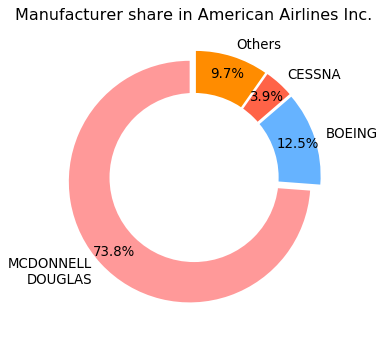

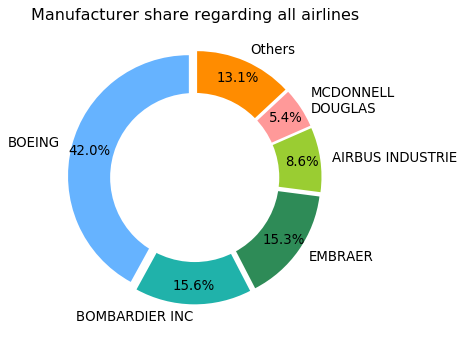

In [24]:
#Chart 1

_ = plt.rcParams['figure.figsize'] = [10, 10]

df1 = df_Air['manufacturer'].value_counts().reset_index()
df1_sum = sum(df1['manufacturer'].iloc[3:])
df1_list = [n for n in df1['manufacturer'].iloc[:3]]
df1_list.append(df1_sum)

labels = ['MCDONNELL\nDOUGLAS', 'BOEING', 'CESSNA', 'Others']
colors = ['#ff9999','#66b3ff', '#FF6347', '#FF8C00']
explode = (0.05, 0.05, 0.05, 0.05)
_ = plt.figure(figsize=(5,5))
_ = plt.pie(df1_list, colors = colors, labels=labels, 
            autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
_ = plt.title('Manufacturer share in American Airlines Inc.')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


_ = plt.rcParams['figure.figsize'] = [10, 10]

df2 = df['manufacturer'].value_counts().reset_index()
df2_sum = sum(df2['manufacturer'].iloc[5:])
df2_list = [n for n in df2['manufacturer'].iloc[:5]]
df2_list.append(df2_sum)

labels = ['BOEING', 'BOMBARDIER INC', 'EMBRAER', 'AIRBUS INDUSTRIE', 'MCDONNELL\nDOUGLAS', 'Others']
colors = ['#66b3ff','#20B2AA', '#2E8B57', '#9ACD32','#ff9999', '#FF8C00']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
_ = plt.figure(figsize=(5,5))
_ = plt.pie(df2_list, colors = colors, labels=labels, 
            autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
_ = plt.title('Manufacturer share regarding all airlines')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

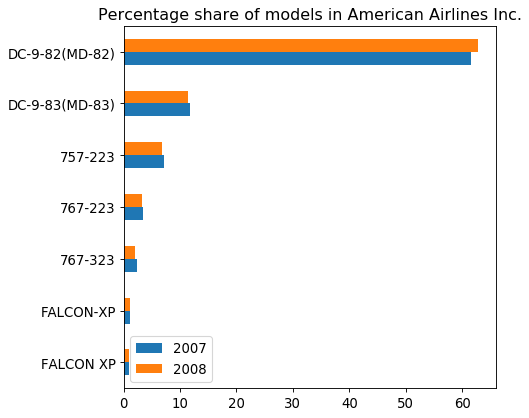

In [55]:
#Chart2

df3 = df_Air['model'][df_Air['Year'] == '2007'].value_counts().reset_index()
df3.columns = ['model', 'value_2007']
df3['percentage_2007'] = round(df3['value_2007']/sum(df3['value_2007'])*100, 2)

df4 = df_Air['model'][df_Air['Year'] == '2008'].value_counts().reset_index()
df4.columns = ['model', 'value_2008']
df4['percentage_2008'] = round(df4['value_2008']/sum(df4['value_2008'])*100, 2)

df3 = pd.merge(df3, df4, on = 'model', how = 'left')

_ = df3.sort_values('value_2008', ascending = True).tail(7).plot(kind = 'barh', x = 'model', y = ['percentage_2007', 
                                                                                             'percentage_2008'])
_ = plt.tight_layout
_ = plt.legend(['2007', '2008'], loc = 'best')
_ = plt.ylabel('')
_ = plt.xlabel('')
_ = plt.title('Percentage share of models in American Airlines Inc.')

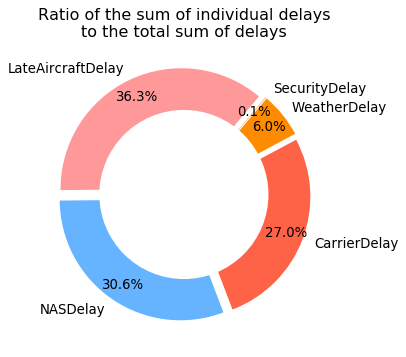

In [26]:
#Chart 3

df4 = df_Air[['WeatherDelay', 'LateAircraftDelay', 'SecurityDelay', 'NASDelay', 'CarrierDelay']]
df5 = pd.melt(df4)
df5 = df5.groupby('variable', as_index = False).agg({'value':'sum'})
df5 = df5.sort_values('value', ascending = False)
df5_list = df5.value.iloc[:6].tolist()
df5['percentage'] = round(df5['value']/sum(df5['value'])*100, 2)


_ = plt.rcParams['figure.figsize'] = [10, 10]

labels = ['LateAircraftDelay', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'SecurityDelay']
colors = ['#ff9999','#66b3ff', '#FF6347', '#FF8C00', '#FF8C00']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
_ = plt.figure(figsize=(5,5))
_ = plt.pie(df5_list, colors = colors, labels=labels, 
            autopct='%1.1f%%', startangle=50, pctdistance=0.85, explode = explode)
_ = plt.title('Ratio of the sum of individual delays\nto the total sum of delays')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

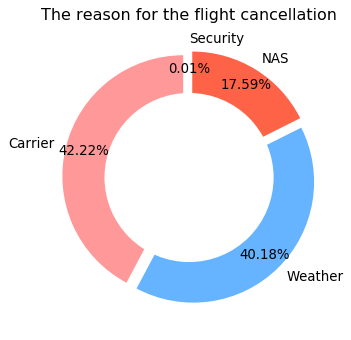

In [27]:
#Chart 4

df6 = df_Air['CancellationCode'].value_counts().reset_index()
df6_list = [n for n in df6['CancellationCode'].iloc[:4]]

labels = ['Carrier', 'Weather', 'NAS', 'Security']
colors = ['#ff9999','#66b3ff', '#FF6347', '#FF8C00']
explode = (0.05, 0.05, 0.05, 0.05)
_ = plt.figure(figsize=(5,5))
_ = plt.pie(df6_list, colors = colors, labels=labels, 
            autopct='%1.2f%%', startangle=90, pctdistance=0.85, explode = explode)
_ = plt.title('The reason for the flight cancellation')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

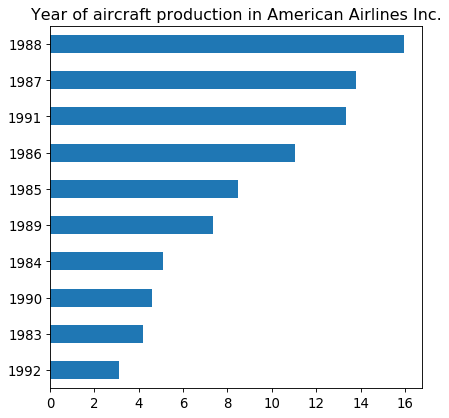

In [57]:
#Chart 5

df8 = df_Air['year'].value_counts(normalize=True, dropna = True).reset_index()
df8 = df8.sort_values('year', ascending = True)
df8['year'] = df8['year'].apply(lambda x: x*100)
_ = df8.tail(10).plot(kind='barh', x = 'index', legend = None)
_ = plt.tight_layout
_ = plt.ylabel('')
_ = plt.xlabel('')
_ = plt.title("Year of aircraft production in American Airlines Inc.")

C:\Users\Karol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


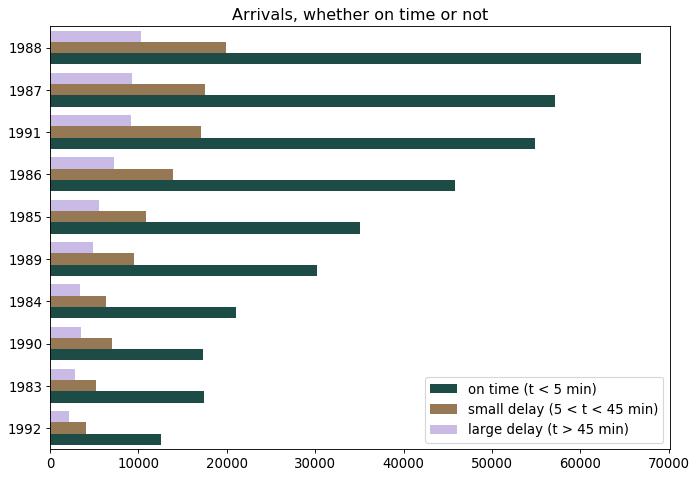

In [29]:
#Chart 6

delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df_Air['DELAY_LEVEL'] = df_Air['DepDelay'].apply(delay_type)

df_delay_type = pd.DataFrame(df_Air['year'].value_counts())
df_delay_type.sort_values('year', ascending = True, inplace=True)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="year", hue='DELAY_LEVEL', data=df_Air, palette='cubehelix', 
                  order = df_delay_type.index)
_ = plt.ylim(22.5, 32.5)
_ = plt.tight_layout
_ = plt.ylabel('')
_ = plt.xlabel('')
_ = plt.title("Arrivals, whether on time or not")
_ = plt.legend(['on time (t < 5 min)', 'small delay (5 < t < 45 min)', 'large delay (t > 45 min)'], loc='best')

C:\Users\Karol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



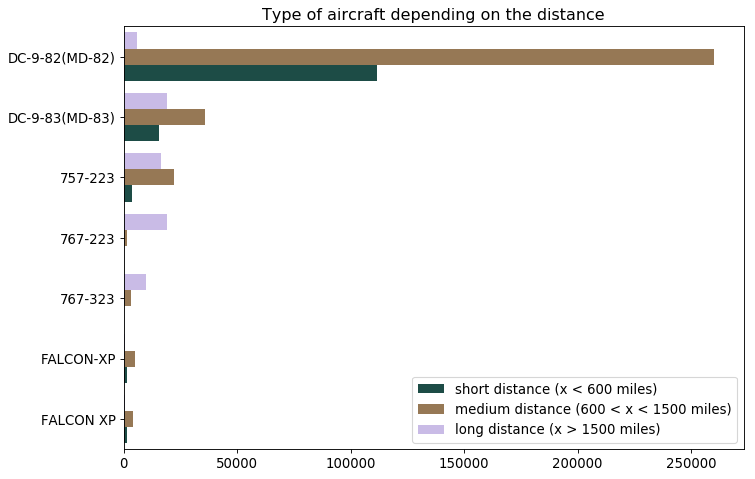

In [56]:
#Chart 7

distance_type = lambda x:((0,1)[x > 600],2)[x > 1500]
df_Air['DISTANCE_LEVEL'] = df_Air['Distance'].apply(distance_type)

df_distance_model = pd.DataFrame(df_Air['model'].value_counts())
df_distance_model.sort_values('model', ascending = True, inplace=True)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="model", hue='DISTANCE_LEVEL', data=df_Air, palette='cubehelix', 
                  order = df_distance_model.index)
_ = plt.ylim(31.5, 38.5)
_ = plt.tight_layout
_ = plt.ylabel('')
_ = plt.xlabel('')
_ = plt.title("Type of aircraft depending on the distance")
_ = plt.legend(['short distance (x < 600 miles)', 'medium distance (600 < x < 1500 miles)', 'long distance (x > 1500 miles)'], loc='lower right')

C:\Users\Karol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


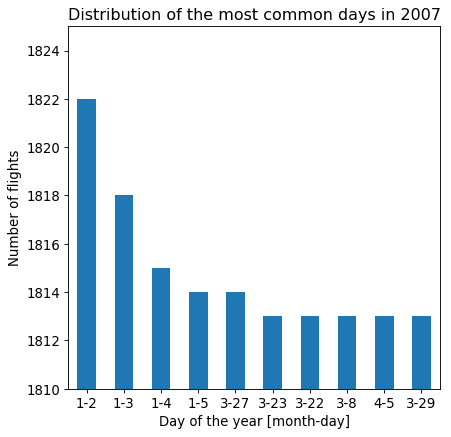

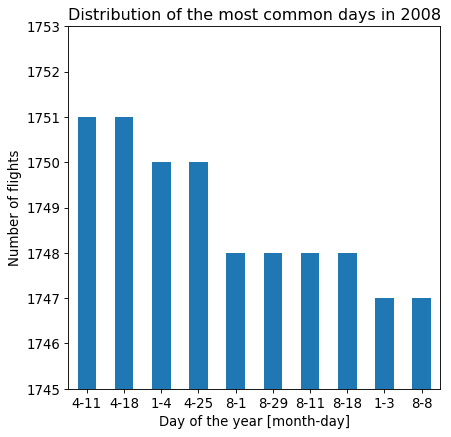

In [31]:
#Chart 8

df_Air['Month-Day'] = df_Air.apply(lambda x: '{}-{}'.format(x['Month'], x['DayofMonth']), axis = 1)

fig, ax = plt.subplots(figsize=(6, 6))
df_Air['Month-Day'][df_Air['Year'] == '2007'].value_counts().head(10).plot(kind='bar')
_ = plt.ylim(1810,1825)
_ = plt.xticks(rotation=0)
_ = plt.ylabel('Number of flights')
_ = plt.xlabel('Day of the year [month-day]')
_ = plt.title("Distribution of the most common days in 2007")

fig, ax = plt.subplots(figsize=(6, 6))
df_Air['Month-Day'][df_Air['Year'] == '2008'].value_counts().head(10).plot(kind='bar')
_ = plt.ylim(1745,1753)
_ = plt.xticks(rotation=0)
_ = plt.ylabel('Number of flights')
_ = plt.xlabel('Day of the year [month-day]')
_ = plt.title("Distribution of the most common days in 2008")

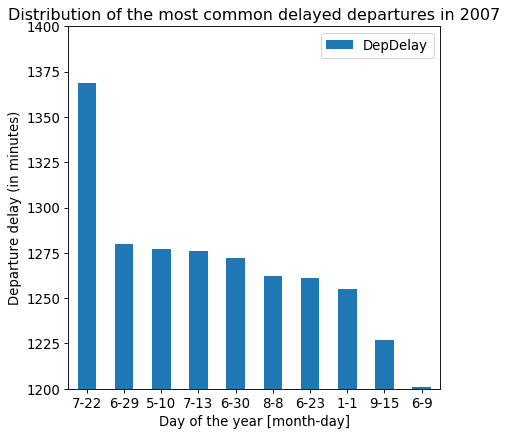

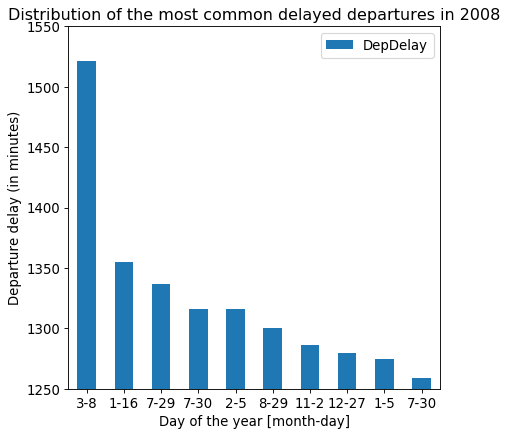

In [85]:
#Chart 8_a

df_Air[['Month-Day','DepDelay']][df_Air['Year'] == '2007'].sort_values('DepDelay', ascending=False).head(10).plot(kind='bar', x='Month-Day', y='DepDelay')
_ = plt.ylim(1200,1400)
_ = plt.xticks(rotation=0)
_ = plt.ylabel('Departure delay (in minutes)')
_ = plt.xlabel('Day of the year [month-day]')
_ = plt.title("Distribution of the most common delayed departures in 2007")

df_Air[['Month-Day','DepDelay']][df_Air['Year'] == '2008'].sort_values('DepDelay', ascending=False).head(10).plot(kind='bar', x='Month-Day', y='DepDelay')
_ = plt.ylim(1250,1550)
_ = plt.xticks(rotation=0)
_ = plt.ylabel('Departure delay (in minutes)')
_ = plt.xlabel('Day of the year [month-day]')
_ = plt.title("Distribution of the most common delayed departures in 2008")

C:\Users\Karol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Karol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


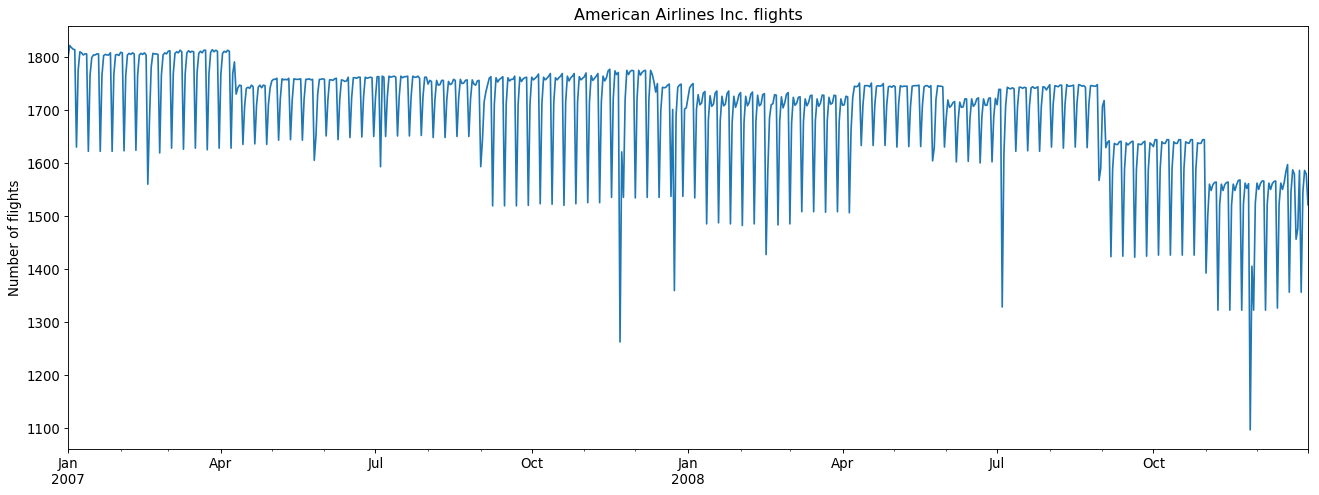

In [33]:
#Chart 9

df_Air['Year_Month_DayofMonth'] = df_Air.apply(lambda x: '{}-{}'.format(x['Year'], x['Month-Day']), axis = 1)
df_Air['Year_Month_DayofMonth'] = pd.to_datetime(df_Air['Year_Month_DayofMonth'])

_ = df_Air.groupby(['Year_Month_DayofMonth']).agg({'Description': 'count'}).plot(figsize = (20, 7), legend = None)
_ = plt.xlabel('')
_ = plt.ylabel('Number of flights')
_ = plt.title('American Airlines Inc. flights')

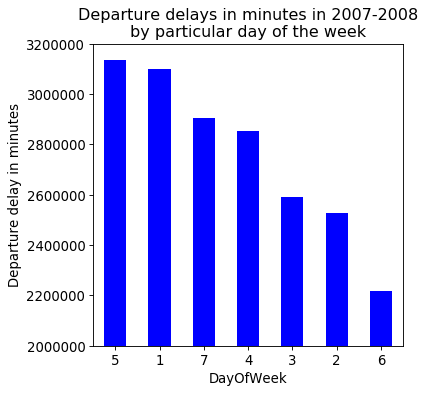

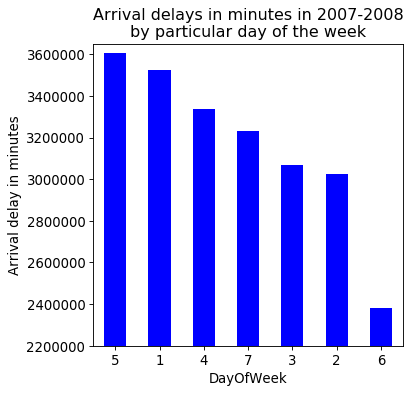

In [34]:
#Chart 10
fig, ax = plt.subplots(figsize=(5, 5))
_ = df_Air[df_Air['DepDelay'] > 0].groupby(['DayOfWeek'])['DepDelay'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
_ = plt.title('Departure delays in minutes in 2007-2008\nby particular day of the week')
_ = plt.ylabel('Departure delay in minutes')
_ = plt.xticks(rotation=0)
_ = plt.ylim(2000000,3200000)

#Chart 11
fig, ax = plt.subplots(figsize=(5, 5))
_ = df_Air[df_Air['ArrDelay'] > 0].groupby(['DayOfWeek'])['ArrDelay'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
_ = plt.title('Arrival delays in minutes in 2007-2008\nby particular day of the week')
_ = plt.ylabel('Arrival delay in minutes')
_ = plt.xticks(rotation=0)
_ = plt.ylim(2200000,3650000)

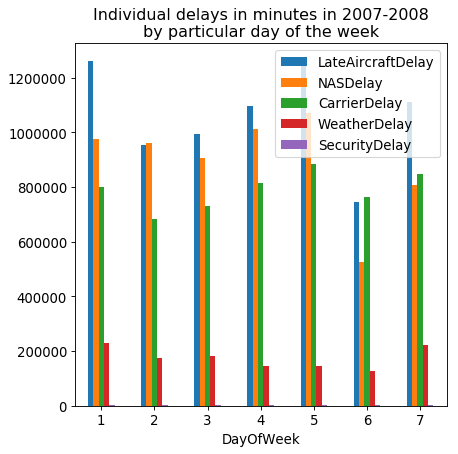

In [58]:
#Chart 12

_ = df_Air.groupby(['DayOfWeek'])[['LateAircraftDelay', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'SecurityDelay']].sum().plot(kind = 'bar')
_ = plt.xticks(rotation=0)
_ = plt.title('Individual delays in minutes in 2007-2008\nby particular day of the week')

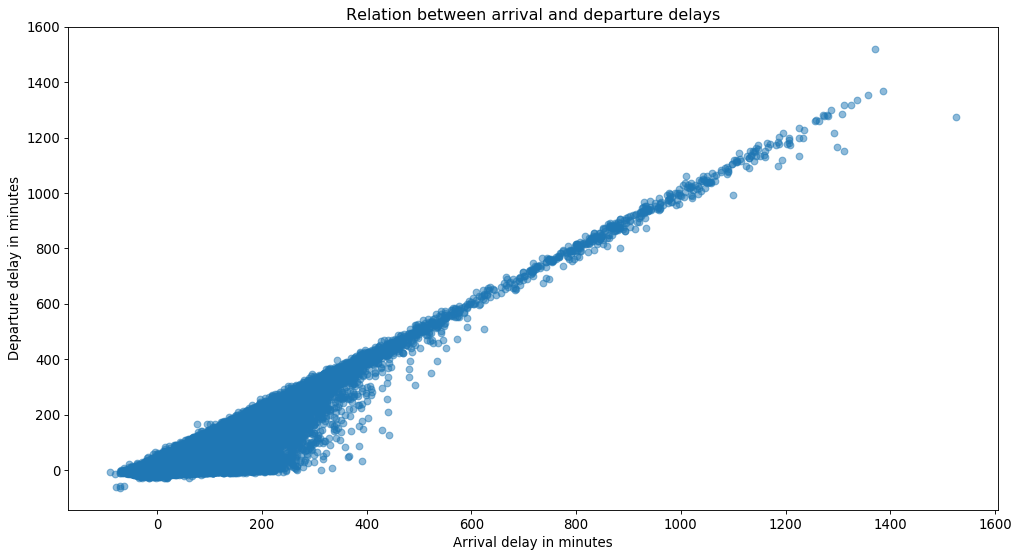

In [36]:
#Chart 13

_ = plt.figure(figsize=(15,8))
_ = plt.scatter(x = 'ArrDelay', y = 'DepDelay', data = df_Air, alpha = 0.5)
_ = plt.title('Relation between arrival and departure delays')
_ = plt.xlabel('Arrival delay in minutes')
_ = plt.ylabel('Departure delay in minutes')

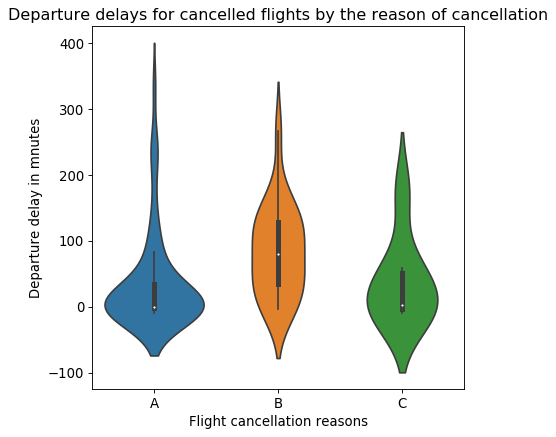

In [42]:
#Chart 14

_ = sns.violinplot(x = 'CancellationCode', y = 'DepDelay', data = df_Air)
_ = plt.title('Departure delays for cancelled flights by the reason of cancellation')
_ = plt.xlabel('Flight cancellation reasons')
_ = plt.ylabel('Departure delay in mnutes')
_ = plt.xlim(-0.5,2.5)

<Figure size 720x432 with 0 Axes>

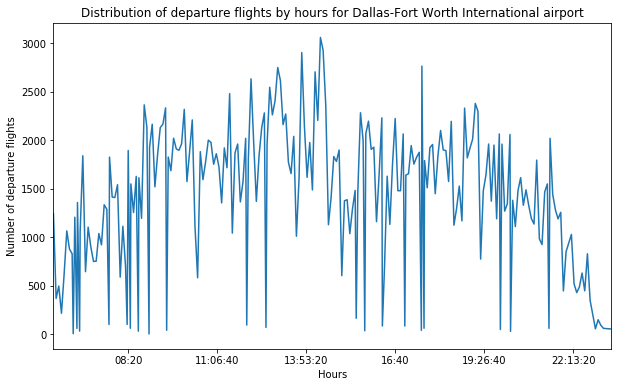

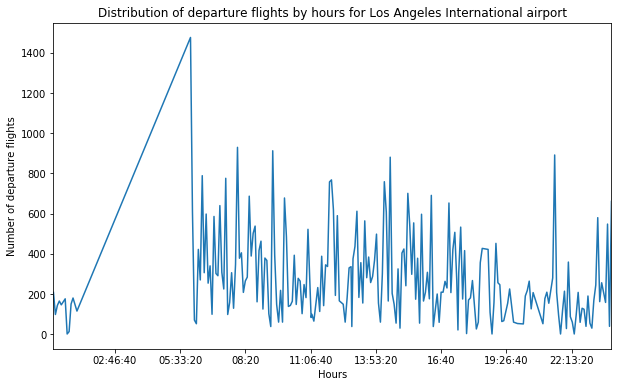

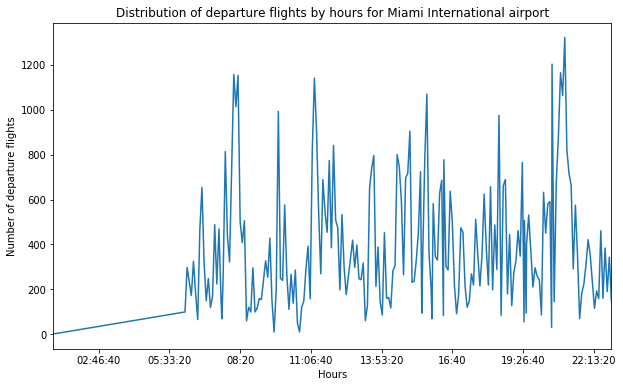

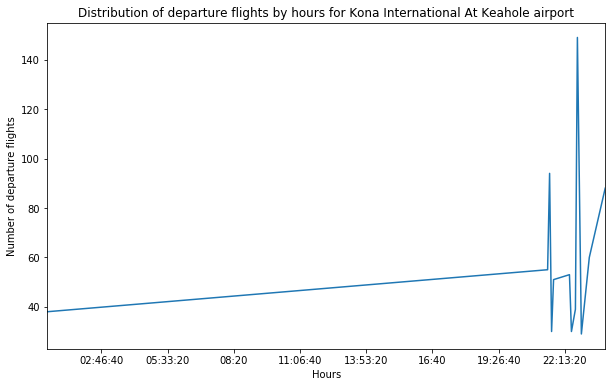

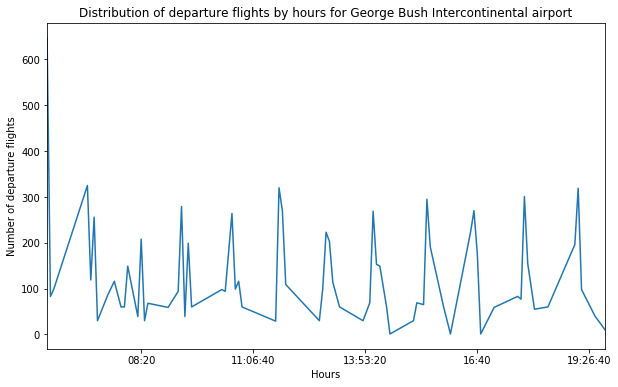

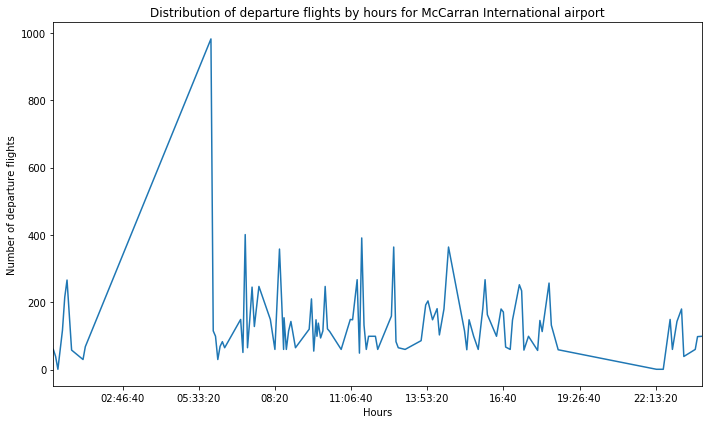

In [73]:
# Chart 14a

# Function converting the 'HHMM' string to datetime.time
def time_format(float_time):
    if pd.isnull(float_time):
        return np.nan
    else:
        if float_time == 2400: float_time = 0
        float_time = "{0:04d}".format(int(float_time))
        time = datetime.time(int(float_time[0:2]), int(float_time[2:4]))
        return time
    
df_Air['DepTime'] = df_Air['DepTime'].apply(time_format)
df_Air['CRSDepTime'] = df_Air['CRSDepTime'].apply(time_format)
df_Air['ArrTime'] = df_Air['ArrTime'].apply(time_format)
df_Air['CRSArrTime'] = df_Air['CRSArrTime'].apply(time_format)

list_of_airports = ['Dallas-Fort Worth International', 'Los Angeles International','Miami International', 'Kona International At Keahole', 'George Bush Intercontinental', 'McCarran International']

_ = plt.figure(figsize=(10,6))
for i in range(len(list_of_airports)):
    _ = df_Air[df_Air['airport_origin'] == list_of_airports[i]].groupby(['CRSDepTime']).agg({'Description': 'count'}).sort_values('Description', ascending = True).plot(legend = False, figsize=(10,6))
    _ = plt.title('Distribution of departure flights by hours for {} airport' .format(list_of_airports[i]))
    _ = plt.xlabel('Hours')
    _ = plt.ylabel('Number of departure flights')
    
plt.tight_layout()

In [43]:
# _ = df_Air[df_Air['airport_origin'] == 'Albuquerque International'].groupby(['CRSDepTime']).agg({'Description': 'count'}).plot(legend = False)

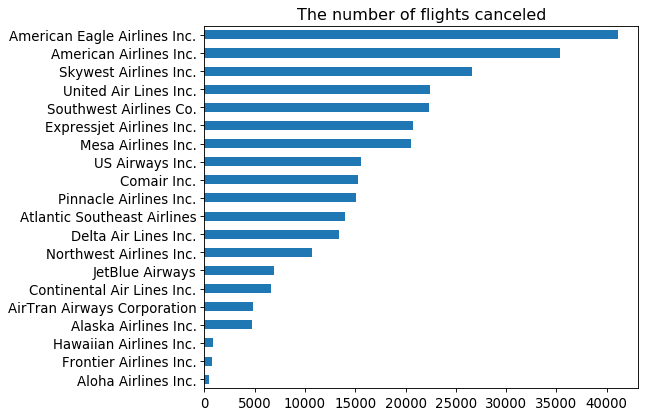

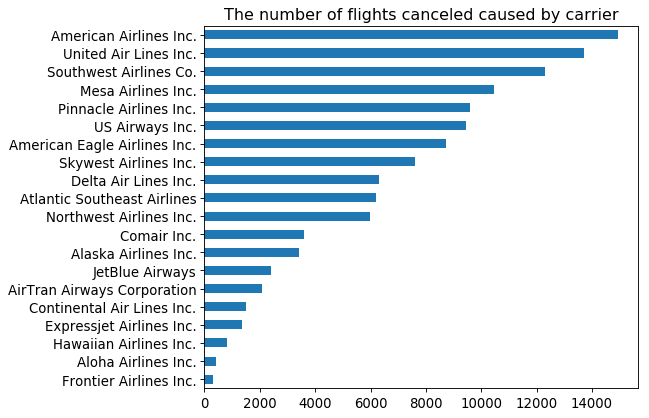

In [44]:
#Chart 15

fig, ax = plt.subplots(figsize=(7, 6))
_ = df['Cancelled'].groupby(df['Description']).sum().sort_values().plot(kind='barh')
_ = plt.ylabel('')
_ = plt.xlabel('')
_ = plt.title("The number of flights canceled")

'CancellationCode'
fig, ax = plt.subplots(figsize=(7, 6))
_ = df['Cancelled'][df['CancellationCode'] == 'A'].groupby(df['Description']).sum().sort_values().plot(kind='barh')
_ = plt.ylabel('')
_ = plt.xlabel('')
_ = plt.title("The number of flights canceled caused by carrier")

In [45]:
#Creating table with statistics for specific airport (Departures)

df_Air['total_delay'] = (df_Air['CarrierDelay'] + df_Air['WeatherDelay']
             + df_Air['NASDelay'] + df_Air['SecurityDelay'] + df_Air['LateAircraftDelay'])

df_Air_delayed = df_Air[~np.isnan(df_Air['total_delay'])]
df_Air['total_delay'].fillna(0, inplace = True)

airport_origin_flights = df_Air['airport_origin'].groupby(df_Air['airport_origin']).count()
airport_origin_cancelled = df_Air['Cancelled'].groupby(df_Air['airport_origin']).sum()
airport_origin_delayed = df_Air_delayed['airport_origin'].groupby(df_Air_delayed['airport_origin']).count()
airport_diverted = df_Air['Diverted'].groupby(df_Air['airport_origin']).sum()
airport_avg_time = df_Air['AirTime'].groupby(df_Air['airport_origin']).mean()
airport_avg_dist = df_Air['Distance'].groupby(df_Air['airport_origin']).mean()
airport_avg_delay = df_Air['total_delay'].groupby(df_Air['airport_origin']).mean()
airport_avg_taxiIn = df_Air['TaxiIn'].groupby(df_Air['airport_origin']).mean()
airport_avg_taxiOut = df_Air['TaxiOut'].groupby(df_Air['airport_origin']).mean()

carrier_pct_cancelled = 100 * np.divide(airport_origin_cancelled, airport_origin_flights)

summary_table_airport = pd.concat([airport_origin_flights, airport_origin_cancelled, carrier_pct_cancelled, 
                                   airport_diverted, airport_avg_time, airport_avg_dist, airport_avg_delay,
                                   airport_avg_taxiIn, airport_avg_taxiOut], axis=1)
summary_table_airport.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']
summary_table_airport.reset_index(inplace = True)
summary_table_airport.head(5)

C:\Users\Karol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Karol\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,airport_origin,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
0,Albuquerque International,6917,209,3.021541,26,87.451063,659.005205,11.736157,11.464417,11.645998
1,Austin-Bergstrom International,20147,587,2.913585,25,95.182288,648.207326,10.959349,9.508288,12.204441
2,Baltimore-Washington International,6919,166,2.399191,22,164.196256,1183.676543,13.310739,9.564799,14.549679
3,Birmingham International,2677,73,2.726933,13,95.817059,597.000000,11.830781,10.652783,12.263416
4,Bradley International,3617,61,1.686481,24,198.179502,1454.427703,14.045618,9.241273,13.957417


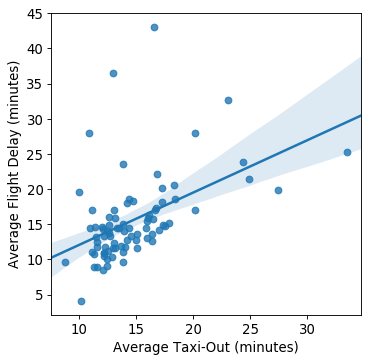

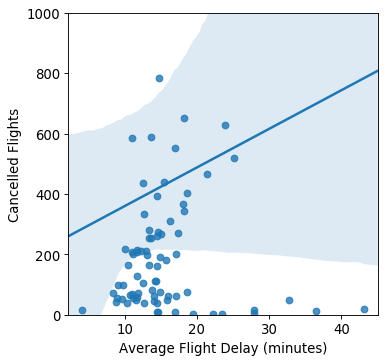

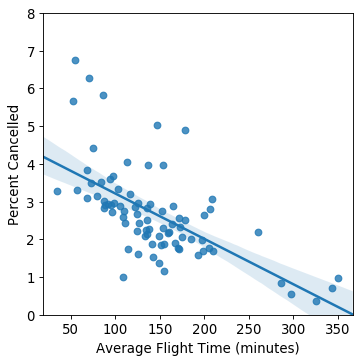

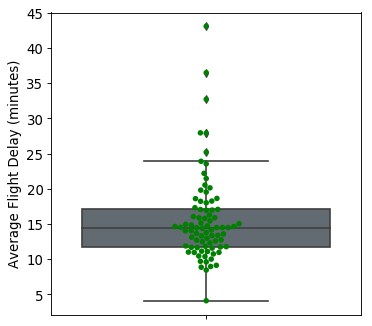

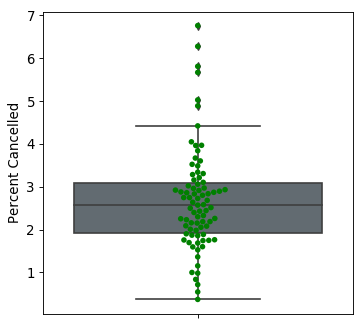

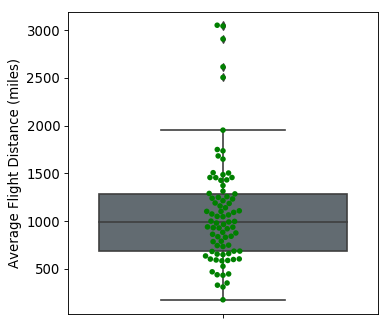

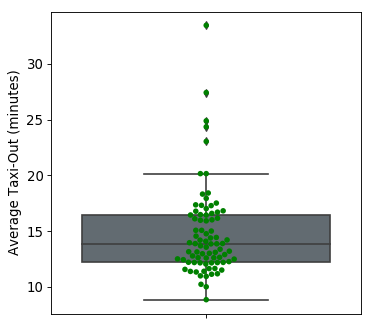

In [46]:
#Chart 16 dependencies (Departures)

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.regplot(x= 'Average Taxi-Out (minutes)', 
                y = 'Average Flight Delay (minutes)', data = summary_table_airport, ax = ax)
_ = plt.tight_layout

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.regplot(x= 'Average Flight Delay (minutes)',
                y = 'Cancelled Flights', data = summary_table_airport, ax = ax)
_ = plt.tight_layout
_ = plt.ylim(0,1000)

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.regplot(x= 'Average Flight Time (minutes)',
                y = 'Percent Cancelled', data = summary_table_airport, ax = ax)
_ = plt.tight_layout
_ = plt.ylim(0,8)

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.swarmplot(
                y = 'Average Flight Delay (minutes)', data = summary_table_airport, ax = ax, color = 'green')
_ = sns.boxplot(
                y = 'Average Flight Delay (minutes)', data = summary_table_airport, ax = ax, saturation=0.1)

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.swarmplot(
                y = 'Percent Cancelled', data = summary_table_airport, ax = ax, color = 'green')
_ = sns.boxplot(
                y = 'Percent Cancelled', data = summary_table_airport, ax = ax, saturation=0.1)

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.swarmplot(
                y = 'Average Flight Distance (miles)', data = summary_table_airport, ax = ax, color = 'green')
_ = sns.boxplot(
                y = 'Average Flight Distance (miles)', data = summary_table_airport, ax = ax, saturation=0.1)


fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.swarmplot(
                y = 'Average Taxi-Out (minutes)', data = summary_table_airport, ax = ax, color = 'green')
_ = sns.boxplot(
                y = 'Average Taxi-Out (minutes)', data = summary_table_airport, ax = ax, saturation=0.1)

In [47]:
#Creating table with statistics for specific airport (Arrivals)

airport_dest_flights = df_Air['airport_dest'].groupby(df_Air['airport_dest']).count()
airport_dest_cancelled = df_Air['Cancelled'].groupby(df_Air['airport_dest']).sum()
airport_dest_delayed = df_Air_delayed['airport_dest'].groupby(df_Air_delayed['airport_dest']).count()
airport_diverted = df_Air['Diverted'].groupby(df_Air['airport_dest']).sum()
airport_avg_time = df_Air['AirTime'].groupby(df_Air['airport_dest']).mean()
airport_avg_dist = df_Air['Distance'].groupby(df_Air['airport_dest']).mean()
airport_avg_delay = df_Air['total_delay'].groupby(df_Air['airport_dest']).mean()
airport_avg_taxiIn = df_Air['TaxiIn'].groupby(df_Air['airport_dest']).mean()
airport_avg_taxiOut = df_Air['TaxiOut'].groupby(df_Air['airport_dest']).mean()

carrier_pct_cancelled = 100 * np.divide(airport_dest_cancelled, airport_dest_flights)

summary_table_airport_dest = pd.concat([airport_dest_flights, airport_dest_cancelled, carrier_pct_cancelled, 
                                   airport_diverted, airport_avg_time, airport_avg_dist, airport_avg_delay,
                                   airport_avg_taxiIn, airport_avg_taxiOut], axis=1)
summary_table_airport_dest.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']
summary_table_airport_dest.reset_index(inplace = True)
summary_table_airport_dest.head(5)

,airport_dest,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
0,Albuquerque International,6916,189,2.732794,5,96.280869,658.938837,15.505784,5.490922,16.492828
1,Austin-Bergstrom International,20150,578,2.868486,18,88.775442,647.919504,13.818561,5.425393,14.938802
2,Baltimore-Washington International,6915,154,2.227043,4,147.746485,1183.730875,15.308749,5.621011,15.096577
3,Birmingham International,2676,70,2.615845,3,78.330004,597.000000,14.360239,3.836673,15.482237
4,Bradley International,3617,58,1.603539,6,178.847171,1454.099254,17.139618,4.341776,16.220028


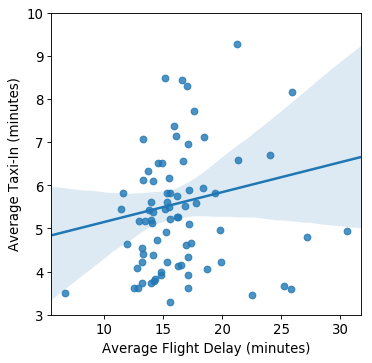

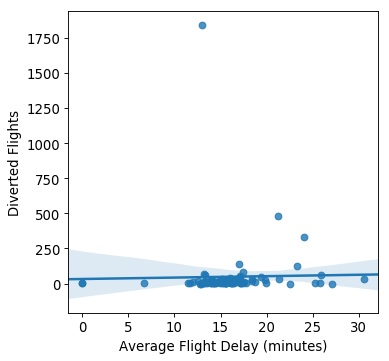

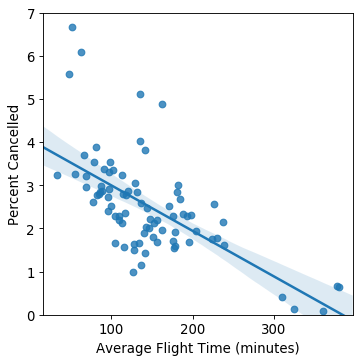

In [48]:
#Chart 17 dependencies (Arrivals)

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.regplot(x= 'Average Flight Delay (minutes)', 
                y = 'Average Taxi-In (minutes)', data = summary_table_airport_dest, ax = ax)
_ = plt.tight_layout
_ = plt.ylim(3,10)

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.regplot(x= 'Average Flight Delay (minutes)',
                y = 'Diverted Flights', data = summary_table_airport_dest, ax = ax)
_ = plt.tight_layout

fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.regplot(x= 'Average Flight Time (minutes)',
                y = 'Percent Cancelled', data = summary_table_airport_dest, ax = ax)
_ = plt.ylim(0,7)
_ = plt.tight_layout

In [49]:
### MAPS 1

df_maps = summary_table_airport[['airport_origin', 'Total Flights']]
df_maps.columns = ['airport', 'flights']
df_maps = pd.merge(df_maps, df_airports, on = 'airport', how = 'left')
df_maps = df_maps.sort_values('flights', ascending = False)

plotly.tools.set_credentials_file(username='karol_m', api_key='XlNE0TdaafeuQX5qUlnz')

df_maps['text'] = df_maps['airport'] + '<br>Total Flights' + (df_maps['flights']).astype(str)
limits = [(0,2),(3,10),(11,20),(21,50),(50,82)]
colors = ['#0000CD','#008000', '#800000','#FF00FF', '#FF4500']
cities = []
scale = 200

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_maps[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['long'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = go.scattergeo.Marker(
            size = df_sub['flights']/scale,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = go.Layout(
        title = go.layout.Title(
            text = 'Total number of flights in years 2007-2008 (American Airlines Inc.)'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)
py.iplot(fig, filename='d3-bubble-map-populations')

C:\Users\Karol\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [50]:
### MAPS 2

df_maps2 = summary_table_airport[['airport_origin', 'Percent Cancelled']]
df_maps2.columns = ['airport', 'Cancelled']
df_maps2 = pd.merge(df_maps2, df_airports, on = 'airport', how = 'left')
df_maps2 = df_maps2.sort_values('Cancelled', ascending = False)

plotly.tools.set_credentials_file(username='karol_m', api_key='XlNE0TdaafeuQX5qUlnz')

df_maps2['text'] = df_maps2['airport'] + '<br>Percent of cancelled flights' + (df_maps2['Cancelled']).astype(str)
limits = [(0,4),(5,20),(21,30),(31,65),(65,82)]
colors = ['#0000CD','#008000', '#800000','#FF00FF', '#FF4500']
cities = []
scale = 0.02

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_maps2[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['long'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = go.scattergeo.Marker(
            size = df_sub['Cancelled']/scale,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = go.Layout(
        title = go.layout.Title(
            text = 'Total percentage of canceled flights in years 2007-2008 (American Airlines Inc.)'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)
py.iplot(fig, filename='d3-bubble-map-populations')

C:\Users\Karol\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [51]:
### Weather conditions
# URL

df_weather = pd.read_csv('https://ndawn.ndsu.nodak.edu/table.csv?station=23&variable=ddmxt&variable=ddmxtt&variable=ddmnt&variable=ddmntt&variable=ddavt&variable=dddtr&variable=ddbst&variable=ddtst&variable=ddws&variable=ddmxws&variable=ddmxwst&variable=ddwd&variable=ddwdsd&variable=ddsr&variable=ddtpetp&variable=ddtpetjh&variable=ddr&variable=dddp&variable=ddwc&variable=ddmnwc&variable=ddmxt9&variable=ddmxtt9&variable=ddmnt9&variable=ddmntt9&variable=ddmxws10&variable=ddmxwst10&variable=ddwd10&variable=ddwdsd10&year=2019&ttype=daily&quick_pick=&begin_date=2007-12-01&end_date=2007-12-31', skiprows=3)
df_weather.columns

Index(['Station Name', 'Latitude', 'Longitude', 'Elevation', 'Year', 'Month',
       'Day', 'Max Temp', 'Max Temp Flag', 'Max Temp Time',
       'Max Temp Time Flag', 'Min Temp', 'Min Temp Flag', 'Min Temp Time',
       'Min Temp Time Flag', 'Avg Temp', 'Avg Temp Flag', 'Diurnal Temp Range',
       'Diurnal Temp Range Flag', 'Avg Bare Soil Temp',
       'Avg Bare Soil Temp Flag', 'Avg Turf Soil Temp',
       'Avg Turf Soil Temp Flag', 'Avg Wind Speed', 'Avg Wind Speed Flag',
       'Max Wind Speed', 'Max Wind Speed Flag', 'Max Wind Speed Time',
       'Max Wind Speed Time Flag', 'Avg Wind Dir', 'Avg Wind Dir Flag',
       'Avg Wind Dir SD', 'Avg Wind Dir SD Flag', 'Total Solar Rad',
       'Total Solar Rad Flag', 'Penman PET', 'Penman PET Flag',
       'Jensen-Haise PET', 'Jensen-Haise PET Flag', 'Rainfall',
       'Rainfall Flag', 'Dew Point', 'Dew Point Flag', 'Wind Chill',
       'Wind Chill Flag', 'Min Wind Chill', 'Min Wind Chill Flag',
       'Max Temp at 9 m', 'Max Temp at 9 m F

In [52]:
#Choosing the most delayed month in New Dakota

ND = df[df['state_origin'] == 'ND']
ND.groupby(['Year', 'Month']).agg({'WeatherDelay':'sum'})
ND[(ND['Year'] == '2007') & (ND['Month'] == '12')].groupby('DayofMonth').agg({'WeatherDelay':'sum'}).head(5)

,WeatherDelay
DayofMonth,
1,26.0
10,75.0
11,0.0
12,0.0
13,0.0


In [53]:
df_weather = df_weather[['Year', 'Month', 'Day', 'Avg Wind Speed', 'Avg Temp']]
df_weather.columns = ['Year', 'Month', 'DayofMonth', 'Avg Wind Speed', 'Avg Temp']
df_weather[['Year', 'Month', 'DayofMonth']] = df_weather[['Year', 'Month', 'DayofMonth']].apply(lambda x: x.astype('str'))
df_weather['DayofMonth'] = df_weather['DayofMonth'].apply(lambda x: x.replace('.0',''))
df_weather['Year'] = df_weather['Year'].apply(lambda x: x.replace('.0',''))
df_weather['Month'] = df_weather['Month'].apply(lambda x: x.replace('.0',''))

df_ND = ND[(ND['Year'] == '2007') & (ND['Month'] == '12') & (ND['airport_origin'] == 'Hector International')]
df_ND = df_ND.groupby('DayofMonth').agg({'WeatherDelay':'sum'})
df_ND.reset_index(inplace=True)

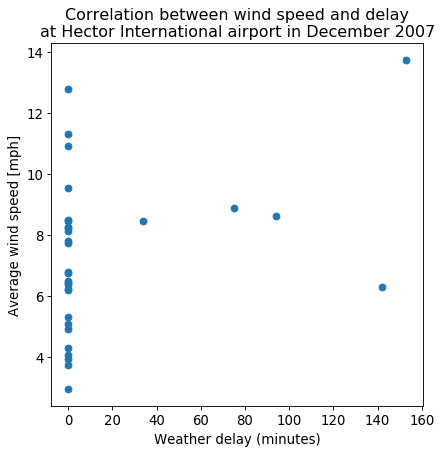

In [54]:
#Weather chart

df_weather_combined = pd.merge(df_weather, df_ND, on = 'DayofMonth', how = 'left')
df_weather_combined.drop([0], axis = 0, inplace = True)
df_weather_combined['Avg Wind Speed'] = df_weather_combined['Avg Wind Speed'].astype(float)
df_weather_combined = df_weather_combined.sort_values('Avg Wind Speed', ascending = True)

fig, ax = plt.subplots(figsize=(6, 6))
_ = plt.scatter(df_weather_combined['WeatherDelay'], df_weather_combined['Avg Wind Speed'])
_ = plt.tight_layout
_ = plt.ylabel('Average wind speed [mph]')
_ = plt.xlabel('Weather delay (minutes)')
_ = plt.title("Correlation between wind speed and delay\nat Hector International airport in December 2007")